In [110]:
import pandas as pd
import numpy as np

In [111]:
data = pd.read_csv("resultados-del-test.csv", delimiter = ",")
data.sample(5)

,fecha,hora,edad,genero,barrio,pregunta_1,pregunta_2,pregunta_3,pregunta_4,pregunta_5,pregunta_6,pregunta_7,pregunta_8,pregunta_9,pregunta_10,pregunta_11,pregunta_12,pregunta_13
2737,2018-05-10,08:27:00,15,Mujer,Palermo,A,A,A,A,A,A,A,A,A,A,A,A,A
1722,2018-10-19,16:17:00,21,Mujer,Otro,C,C,B,B,B,C,C,C,C,C,A,C,C
2935,2018-04-12,18:38:00,30,Mujer,Nuñez,C,C,C,C,C,B,C,B,C,C,B,C,C
5486,2018-02-16,04:24:00,40,Mujer,Vélez Sarsfield,C,C,C,B,C,C,C,C,C,C,C,C,C
5242,2018-02-16,13:07:00,23,Mujer,Recoleta,A,B,A,A,B,A,B,C,C,C,A,C,A


## Creo variable target

In [112]:
data['target'] = data.pregunta_13 != 'C'

In [113]:
data.target.value_counts()

False    3963
True     1713
Name: target, dtype: int64

## Defino feature columns, X e y

In [114]:
categorical_columns = ['genero'] + [col for col in data.columns if 'pregunta_13' not in col and 'pregunta' in col]

In [115]:
categorical_features = pd.get_dummies(data.loc[:, categorical_columns])

In [116]:
data.shape

(5676, 19)

In [117]:
categorical_features.shape

(5676, 39)

Concateno las columnas dummy

In [118]:
data = pd.concat([data, categorical_features], axis = 1)

In [119]:
data.shape

(5676, 58)

Creo un array solo con las columnas que utilizare

In [120]:
feature_cols = categorical_features.columns.tolist()

In [121]:
X = data.loc[:, feature_cols]

In [122]:
y = data.target

## Train test split

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

## Implemento regression logistica

### Entreno la regression logistica

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Veo las metricas

In [160]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score

In [144]:
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)

In [140]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

Text(0.5,1,'ROC Curve')

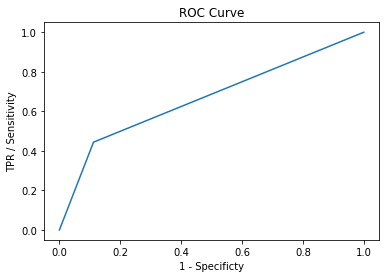

In [150]:
import matplotlib.pyplot as plt

sns.lineplot(fpr, tpr)
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')

In [155]:
log_loss(y_test, y_pred_proba)

0.4888405742828951

In [156]:
auc(fpr, tpr)

0.6659585804954874

In [162]:
accuracy_score(y_test, y_pred)

0.7540521494009866

In [164]:
y_test.value_counts()

False    991
True     428
Name: target, dtype: int64

In [166]:
pd.Series(y_pred).value_counts()

False    1118
True      301
dtype: int64